In [1]:
# Eric Pulick - CS760 HW3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from scipy.special import expit

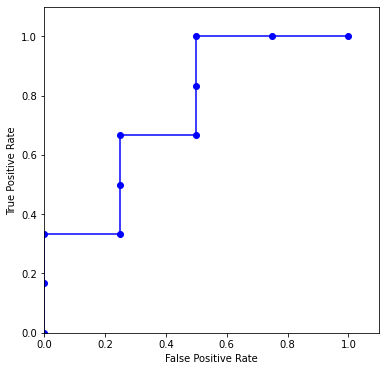

In [3]:
#1-5a
tpr = [0,1/6,2/6,2/6,3/6,4/6,4/6,5/6,1,1,1]
fpr = [0,0,0,1/4,1/4,1/4,2/4,2/4,2/4,3/4,1]

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,'bo-',drawstyle='steps-pre')
ax =plt.gca()
ax.set_xlim(0,1.1)
ax.set_ylim(0,1.1)
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

plt.savefig("5a.png")

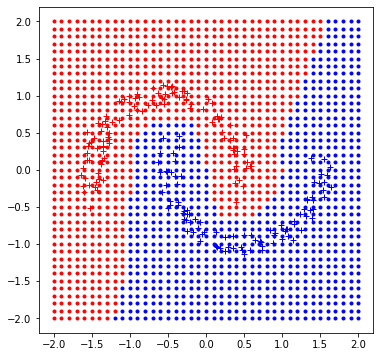

In [4]:
#2-1
# Load data
fp = "data/D2z.txt"
data = np.loadtxt(fp)
# Split into x and y
train_x = data[:,:2]
train_y = data[:,2]

# Make and fit classifier
neigh1 = KNeighborsClassifier(n_neighbors=1,p=2)
neigh1.fit(train_x,train_y)

# Make grid array
start = -2
stop = 2.1
step = .1
x = np.arange(start,stop,step)
y = np.arange(start,stop,step)
grid_data = np.transpose([np.tile(x,len(y)),np.repeat(y,len(x))])
grid_label = neigh1.predict(grid_data)

fig = plt.figure(figsize=(6,6))
plt.plot(train_x[:,0][train_y==1],train_x[:,1][train_y==1],'r+')
plt.plot(train_x[:,0][train_y==0],train_x[:,1][train_y==0],'b+')
plt.plot(grid_data[:,0][grid_label==1],grid_data[:,1][grid_label==1],'r.')
plt.plot(grid_data[:,0][grid_label==0],grid_data[:,1][grid_label==0],'b.')
plt.savefig('2_1.png')

In [5]:
#2-2
# Load data
fp = "data/emails.csv"
data = pd.read_csv(fp)
label = data.Prediction.copy()
data.drop(['Email No.','Prediction'],inplace=True,axis=1)
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Get folds
idx = np.arange(0,5000,1)
five_test_splits = [
    np.arange(0,1000,1),
    np.arange(1000,2000,1),
    np.arange(2000,3000,1),
    np.arange(3000,4000,1),
    np.arange(4000,5000,1)
]
for i,test_index in enumerate(five_test_splits):
    train_index = [x for x in idx if x not in test_index]
    train_x = data.iloc[train_index]
    train_y = label.iloc[train_index]
    test_x = data.iloc[test_index]
    test_y = label.iloc[test_index]

    # Make and fit classifier
    neigh1 = KNeighborsClassifier(n_neighbors=1,p=2)
    neigh1.fit(train_x,train_y)
    preds = neigh1.predict(test_x)

    # Get metrics
    cm = confusion_matrix(test_y,preds)
    
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    TP = cm[1,1]
    acc = (TN+TP)/(TN+TP+FN+FP)
    rec = (TP)/(TP+FN)
    prec = (TP)/(TP+FP)
    print("Fold {}, Acc {}, Prec {}, Rec {}".format(i, acc, prec, rec))
    #disp=ConfusionMatrixDisplay(cm) 
    #disp.plot()
    #plt.show


Fold 0, Acc 0.825, Prec 0.6544943820224719, Rec 0.8175438596491228
Fold 1, Acc 0.853, Prec 0.6857142857142857, Rec 0.8664259927797834
Fold 2, Acc 0.862, Prec 0.7212121212121212, Rec 0.8380281690140845
Fold 3, Acc 0.851, Prec 0.7164179104477612, Rec 0.8163265306122449
Fold 4, Acc 0.775, Prec 0.6057441253263708, Rec 0.7581699346405228


In [8]:
def get_grad_loss(theta,x,y):
    z = np.dot(theta,x)
    #print(z)
    sig = expit(z)
    #print(sig)
    #print("x",x.shape)
    #print("y",y.shape)
    #print("sig", sig.shape)
    return x*(sig-y)

def log_pred(theta,x):
    r=np.dot(theta,x)
    return expit(r)

In [9]:
def train_log(lr, steps, data, train_index):
    theta = np.zeros(data.shape[1])
    for step in np.arange(0,steps,1):
        sum=0
        for i in train_index:
            x_data = data.iloc[i].values
            y_label = label.iloc[i]
            sum+=get_grad_loss(theta,x_data,y_label)
        grad_loss = sum/len(train_index)
        theta = theta - lr*grad_loss
    return theta

In [12]:
for i,test_index in enumerate(five_test_splits):
    train_index = [x for x in idx if x not in test_index]
    train_x = data.iloc[train_index]
    train_y = label.iloc[train_index]
    test_x = data.iloc[test_index]
    test_y = label.iloc[test_index]

    # Make and fit classifier
    params = train_log(0.00075,1000,data,train_index)
    log_pred_proba = []
    log_pred_final = []
    for j in test_index:
        x_data = data.iloc[j].values
        pred = log_pred(params,x_data)
        log_pred_proba.append(pred)
        if pred>=0.5:
            log_pred_final.append(1)
        else:
            log_pred_final.append(0)

    # Get metrics
    cm = confusion_matrix(test_y,log_pred_final)
    
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    TP = cm[1,1]
    acc = (TN+TP)/(TN+TP+FN+FP)
    rec = (TP)/(TP+FN)
    prec = (TP)/(TP+FP)
    print("Fold {}, Acc {}, Prec {}, Rec {}".format(i, acc, prec, rec))
    print(roc_auc_score(test_y,log_pred_proba))

Fold 0, Acc 0.9, Prec 0.8178694158075601, Rec 0.8350877192982457
0.954596981965403
Fold 1, Acc 0.898, Prec 0.8048780487804879, Rec 0.8339350180505415
0.9611326652386017
Fold 2, Acc 0.891, Prec 0.8571428571428571, Rec 0.7394366197183099
0.9647248013218979
Fold 3, Acc 0.861, Prec 0.8743961352657005, Rec 0.6156462585034014
0.9286388776473763
Fold 4, Acc 0.844, Prec 0.7906976744186046, Rec 0.6666666666666666
0.9229106628242075


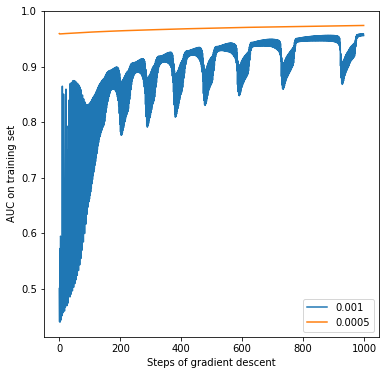

In [80]:
#2-4
test_index = np.arange(0,1000,1)
train_index = [x for x in idx if x not in test_index]
#print(len(train_index))

# train_x = data.iloc[train_index]
train_y = label.iloc[train_index]
# test_x = data.iloc[test_index]
# test_y = label.iloc[test_index]

theta = np.zeros(data.shape[1])
lr_set = [0.001,0.0005]
auc_dict = {}
for lr in lr_set:
    auc = []
    steps = np.arange(0,1000,1)
    for step in steps:
        train_preds = []
        sum=0
        for i in train_index:
            
            x_data = data.iloc[i].values
            y_label = label.iloc[i]

            train_preds.append(log_pred(theta,x_data))
            #print(x_data.shape)
            #print(theta.shape)
            #print(get_grad_loss(theta,x_data,y_label))
            sum+=get_grad_loss(theta,x_data,y_label)

        grad_loss = sum/len(train_index)
        theta = theta - lr*grad_loss
        auc.append(roc_auc_score(train_y,train_preds))
    auc_dict[lr]=auc

fig=plt.figure(figsize=(6,6))

for lr in lr_set:
    lr_auc = auc_dict[lr]
    plt.plot(steps, lr_auc,label=lr)

ax = plt.gca()
ax.set_xlabel("Steps of gradient descent")
ax.set_ylabel("AUC on training set")
ax.legend()

K= 1
0 0.825 0.6544943820224719 0.8175438596491228
1 0.853 0.6857142857142857 0.8664259927797834
2 0.862 0.7212121212121212 0.8380281690140845
3 0.851 0.7164179104477612 0.8163265306122449
4 0.775 0.6057441253263708 0.7581699346405228
K= 3
0 0.847 0.680327868852459 0.8736842105263158
1 0.851 0.6975308641975309 0.8158844765342961
2 0.859 0.7227414330218068 0.8169014084507042
3 0.88 0.7788461538461539 0.826530612244898
4 0.774 0.6086956521739131 0.7320261437908496
K= 5
0 0.837 0.6685082872928176 0.8491228070175438
1 0.85 0.7068403908794788 0.7833935018050542
2 0.869 0.7475728155339806 0.8133802816901409
3 0.869 0.7620578778135049 0.8061224489795918
4 0.779 0.613941018766756 0.7483660130718954
K= 7
0 0.839 0.6712707182320442 0.8526315789473684
1 0.864 0.7252396166134185 0.8194945848375451
2 0.875 0.7556270096463023 0.8274647887323944
3 0.874 0.7781456953642384 0.7993197278911565
4 0.779 0.6145552560646901 0.7450980392156863
K= 10
0 0.862 0.7318611987381703 0.8140350877192982
1 0.869 0.75 

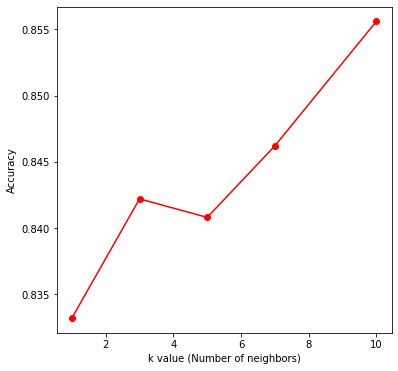

In [13]:
#2-4
k_list = [1,3,5,7,10]
acc_k = []
for k in k_list:
    print("K=",k)
    acc_list =[]
    for i,test_index in enumerate(five_test_splits):
        train_index = [x for x in idx if x not in test_index]
        train_x = data.iloc[train_index]
        train_y = label.iloc[train_index]
        test_x = data.iloc[test_index]
        test_y = label.iloc[test_index]

        # Make and fit classifier
        neigh = KNeighborsClassifier(n_neighbors=k,p=2)
        neigh.fit(train_x,train_y)
        preds = neigh.predict(test_x)

        # Get metrics
        cm = confusion_matrix(test_y,preds)
        
        TN = cm[0,0]
        FN = cm[1,0]
        FP = cm[0,1]
        TP = cm[1,1]
        acc = (TN+TP)/(TN+TP+FN+FP)
        rec = (TP)/(TP+FN)
        prec = (TP)/(TP+FP)
        acc_list.append(acc)
        print(i, acc, prec, rec)
    avg_acc = np.mean(acc_list)
    acc_k.append(avg_acc)
print(acc_k)
fig = plt.figure(figsize=(6,6))
plt.plot(k_list,acc_k,'ro-')
ax=plt.gca()
ax.set_xlabel('k value (Number of neighbors)')
ax.set_ylabel('Accuracy')
plt.savefig('2_4.png')

In [11]:
test_y.head()

4000    1
4001    0
4002    0
4003    1
4004    0
Name: Prediction, dtype: int64

In [16]:
#2-5

test_index = np.arange(4000,5000,1)
train_index = [x for x in idx if x not in test_index]

train_x = data.iloc[train_index]
train_y = label.iloc[train_index]
test_x = data.iloc[test_index]
test_y = label.iloc[test_index]

# Make and fit classifier
neigh5 = KNeighborsClassifier(n_neighbors=5,p=2)
neigh5.fit(train_x,train_y)
preds_prob = neigh.predict_proba(test_x)

log_params = train_log(0.00075,5000,data,train_index)
log_pred_proba = []

for j in test_index:
    x_data = data.iloc[j].values
    pred = log_pred(log_params,x_data)
    log_pred_proba.append(pred)

fpr, tpr, thresholds = roc_curve(test_y,preds_prob[:,1])
fpr_log, tpr_log, thresholds_log = roc_curve(test_y,log_pred_proba)



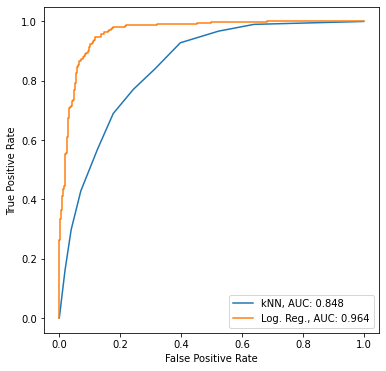

In [17]:
fig = plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="kNN, AUC: {:.3f}".format(roc_auc_score(test_y,preds_prob[:,1])))
plt.plot(fpr_log, tpr_log, label="Log. Reg., AUC: {:.3f}".format(roc_auc_score(test_y,log_pred_proba)))
ax = plt.gca()
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()
plt.savefig('2_5.png')